## Task 1

In [43]:
import numpy as np
import matplotlib.pyplot as plt

plt.rcParams["figure.figsize"] = [6, 4]
plt.style.use("default")

In [44]:
N = 50000  # number of samples
mu, sigma = 0, np.sqrt(0.5)  # mean and standard deviation
X = np.random.normal(mu, sigma, N)
Y = np.random.normal(mu, sigma, N)

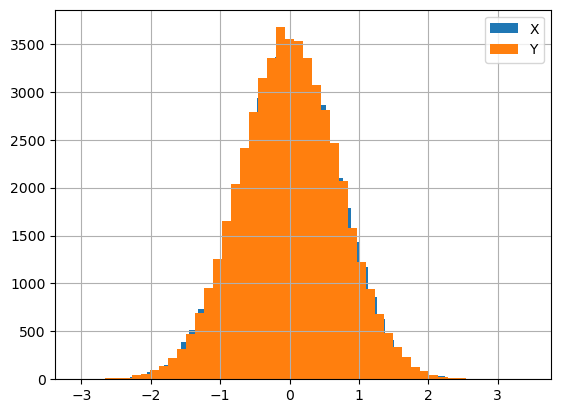

In [45]:
# Plots two histograms on the same figure
plt.hist(X, bins=50, alpha=1, label="X")
plt.hist(Y, bins=50, alpha=1, label="Y")
plt.legend(loc="upper right")
plt.grid()
plt.show()

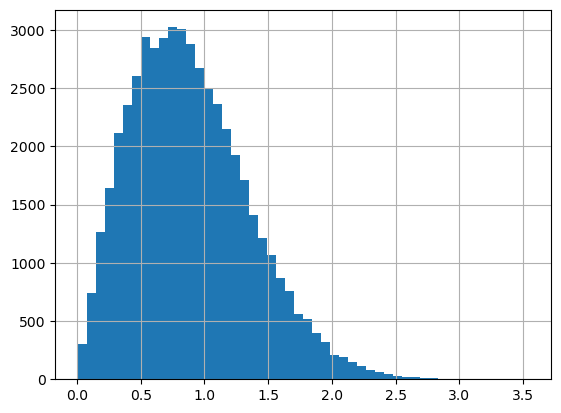

Expected value of E{g^2}: 1.004994021058215


In [46]:
# Rayleigh random variable g such that g = |X + jY| and that the expected value of its square = 1
g = np.sqrt(X**2 + Y**2)

# Plots the histogram of g
plt.hist(g, bins=50, alpha=1)
plt.grid()
plt.show()

# Expected value of g^2
print("Expected value of E{g^2}:", np.mean(g**2))

In [47]:
# Square of magnitude of g^2
print("Expected value of E{g^2}^2:", np.mean(g**2) ** 2)

Expected value of E{g^2}^2: 1.0100129823627597


In [48]:
N = 50000  # number of samples
mu, sigma = 0, np.sqrt(0.5)  # mean and standard deviation
d_v = 2  # vertical distance
d_h = np.arange(20, 70, 5)  # horizontal distance
n = np.arange(3, 4.5, 0.5)  # path loss exponent
P_t = 1  # transmitted power

P_r0 = np.array([])
P_r0_iter = np.array([])
P_r1 = np.array([])
P_r1_iter = np.array([])
P_r2 = np.array([])
P_r2_iter = np.array([])

# Monte Carlo Simulations
iterations = 100  # number of iterations

for d_h_idx in d_h:
    for _ in range(iterations):
        X = np.random.normal(mu, sigma, N)
        Y = np.random.normal(mu, sigma, N)
        g = np.sqrt(X**2 + Y**2)
        mag_g = np.sqrt(np.mean(g**2))

        # Received power
        P_r0_iter = np.append(P_r0_iter, P_t * (d_h_idx**2 + d_v**2)**(-n[0] / 2) * mag_g**(-n[0]))
        P_r1_iter = np.append(P_r1_iter, P_t * (d_h_idx**2 + d_v**2)**(-n[1] / 2) * mag_g**(-n[1]))
        P_r2_iter = np.append(P_r2_iter, P_t * (d_h_idx**2 + d_v**2)**(-n[2] / 2) * mag_g**(-n[2]))
    
    # Average over iterations
    P_r0 = np.append(P_r0, np.mean(P_r0_iter))
    P_r1 = np.append(P_r1, np.mean(P_r1_iter))
    P_r2 = np.append(P_r2, np.mean(P_r2_iter))

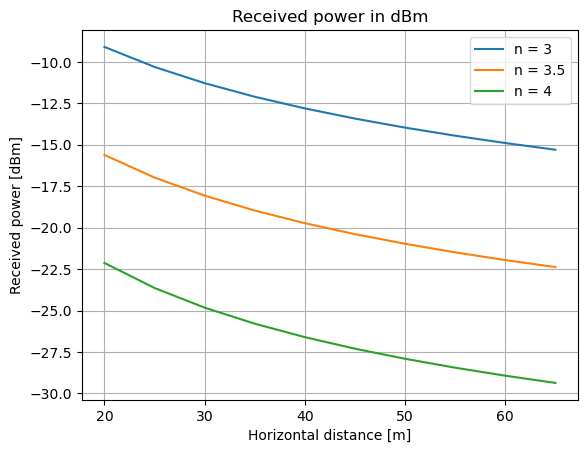

In [49]:
# Plot the received power in dBm
plt.plot(d_h, 10 * np.log10(P_r0 / 1e-3), label = "n = 3")
plt.plot(d_h, 10 * np.log10(P_r1 / 1e-3), label = "n = 3.5")
plt.plot(d_h, 10 * np.log10(P_r2 / 1e-3), label = "n = 4")
plt.xlabel("Horizontal distance [m]")
plt.ylabel("Received power [dBm]")
plt.title("Received power in dBm")
plt.legend()
plt.grid()
plt.show()

## Task 2

In [50]:
import numpy as np
import matplotlib.pyplot as plt

### Task 1-7

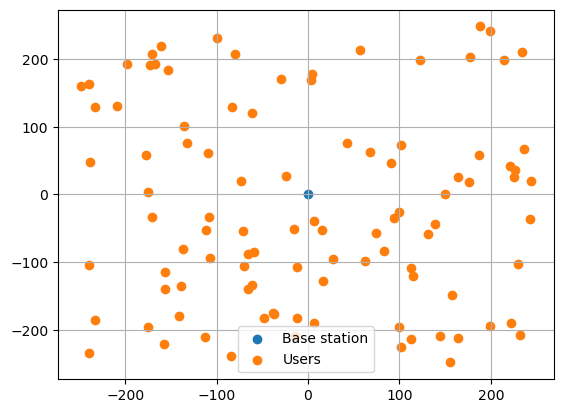

In [51]:
area = [-250, 250] # area of the simulation m^2
n_user = 100 # number of users
n_bs = 1 # number of base stations

# Create a network with base stration at the origin
bs = np.array([[0, 0]])
users = np.array([])

for _ in range(n_user):
    x = np.random.uniform(area[0], area[1])
    y = np.random.uniform(area[0], area[1])
    users = np.append(users, np.array([x, y]))

users = users.reshape(n_user, 2) # reshape the array to 100 x 2

# Plot the network
plt.scatter(bs[:, 0], bs[:, 1], label = "Base station")
plt.scatter(users[:, 0], users[:, 1], label = "Users")
plt.legend()
plt.grid()
plt.show()

In [52]:
# Calculate euclidean distance for each user
def euclidean_distance(x1, y1, x2, y2):
    distance = np.sqrt((x2 - x1)**2 + (y2 - y1)**2)
    return distance

distance_mat = np.array([])

for user in users:
    distance_mat = np.append(distance_mat, euclidean_distance(bs[0][0], bs[0][1], user[0], user[1]))

print("Distance matrix: ", distance_mat)

Distance matrix:  [165.96310326 123.42380771 113.30314888 183.26569771 227.76631036
 175.46234181 251.40536776  75.76752239 169.060438   177.80214125
 158.80300212 226.89053333 196.0887115  310.97756698 295.5827082
 315.49132078 238.89001691 146.59181721 193.61606524 186.48709926
 102.20478829 174.32835031 245.24161187  35.80976098 311.46945725
 180.66056604 224.38643909 153.96144054 268.72247586 153.02396802
 253.08389068 155.85320137 169.37007194 128.60130674 313.02674016
 277.89599953 222.6235887  258.11008232 215.8966497  289.33045728
 145.37860442 118.23286954 188.63077163  54.10806473 245.67331798
 262.26895974 243.14350959 126.4812763   89.6836613  143.3594028
 254.25992622 246.86342638 335.37012353 270.65224831 268.29674905
 245.8448206  172.52551141 297.72666321 125.81786044 220.47052865
 272.43555834 106.9915944  189.7686457  292.14696554 102.41361894
 292.29133097  92.71645047 229.11137375 100.63569719 116.66746588
 233.85526478 209.22281912 193.41900102 255.17202082 178.537

In [53]:
# Calculate path loss for each user
path_loss_mat = np.array([])
n = 3.5 # path loss exponent

for distance in distance_mat:
    path_loss_mat = np.append(path_loss_mat, np.reciprocal(distance**n))

print("Path losses: ", path_loss_mat)

Path losses:  [1.69808563e-08 4.78744401e-08 6.45881835e-08 1.20009563e-08
 5.60772615e-09 1.39751435e-08 3.96907302e-09 2.64124811e-07
 1.59167002e-08 1.33419880e-08 1.98150203e-08 5.68385099e-09
 9.47143810e-09 1.88559442e-09 2.25228537e-09 1.79285036e-09
 4.74577338e-09 2.62189895e-08 9.90159447e-09 1.12909172e-08
 9.26511149e-08 1.42959141e-08 4.32932743e-09 3.63910865e-06
 1.87519255e-09 1.26176425e-08 5.90897125e-09 2.20830024e-08
 3.14366332e-09 2.25601453e-08 3.87770032e-09 2.11589910e-08
 1.58150893e-08 4.14611329e-08 1.84274383e-09 2.79519408e-09
 6.07436483e-09 3.61978359e-09 6.76299926e-09 2.42728327e-09
 2.69928204e-08 5.56437249e-08 1.08481606e-08 8.58189105e-07
 4.30275909e-09 3.42283427e-09 4.46149711e-09 4.39448678e-08
 1.46387281e-07 2.83470819e-08 3.81528769e-09 4.23059417e-09
 1.44765376e-09 3.06590902e-09 3.16115699e-09 4.29226255e-09
 1.48256372e-08 2.19602836e-09 4.47612252e-08 6.28453426e-09
 2.99624092e-09 7.89361957e-08 1.06221981e-08 2.34636283e-09
 9.1991564

In [54]:
N = 50000  # number of samples
mu, sigma = 0, np.sqrt(0.5)  # mean and standard deviation
P_t = 1 # transmitted power
P_r = np.array([])

# Rayleigh fading channel
X = np.random.normal(mu, sigma, N)
Y = np.random.normal(mu, sigma, N)
g = np.sqrt(X**2 + Y**2)
mag_g = np.sqrt(np.mean(g**2))

for path_loss in path_loss_mat:
    P_r = np.append(P_r, P_t * path_loss * mag_g**2) # received power

In [55]:
P_r_dBm = 10 * np.log10(P_r / 1e-3) # received power in dBm
N = -96 # dBm

snr_mat = np.array([])
rate_mat = np.array([])

for i in range(n_user):
    snr_mat = np.append(snr_mat, P_r_dBm[i] - N)
    rate_mat = np.append(rate_mat, np.log2(1 + 10**(snr_mat[i]/10) * 1e-3))

In [56]:
# Outage probability for threshold rate = 2
outage_prob = np.sum(rate_mat < 2) / n_user
print("Outage probability: ", outage_prob)

Outage probability:  0.0


### Monte Carlo Simulation

In [57]:
from tqdm import tqdm

area = [-250, 250] # area of the simulation m^2
n_user = 100 # number of users
n_bs = 1 # number of base stations
n = 3.5 # path loss exponent
Ns = 50000  # number of samples
mu, sigma = 0, np.sqrt(0.5)  # mean and standard deviation
P_t = 1  # transmitted power
N = -96 # 96 dBm
iterations = 100 # number of iterations
outage_prob_mat = np.array([])

for _ in tqdm(list(range(iterations))):
    # Create a network with base stration at the origin
    bs = np.array([[0, 0]])
    users = np.array([])

    for _ in range(n_user):
        x = np.random.uniform(area[0], area[1])
        y = np.random.uniform(area[0], area[1])
        users = np.append(users, np.array([x, y]))

    users = users.reshape(n_user, 2) # reshape the array to 100 x 2
    
    distance_mat = np.array([])
    path_loss_mat = np.array([])

    for user in users:
        distance_mat = np.append(distance_mat, euclidean_distance(bs[0][0], bs[0][1], user[0], user[1]))

    for distance in distance_mat:
        path_loss_mat = np.append(path_loss_mat, np.reciprocal(distance**n))

    P_r = np.array([])
    X = np.random.normal(mu, sigma, Ns)
    Y = np.random.normal(mu, sigma, Ns)
    g = np.sqrt(X**2 + Y**2)
    mag_g = np.sqrt(np.mean(g**2))

    for path_loss in path_loss_mat:
        P_r = np.append(P_r, P_t * path_loss * mag_g**2)

    P_r_dBm = 10 * np.log10(P_r) + 30 # received power in dBm

    snr_mat = np.array([])
    rate_mat = np.array([])

    for i in range(n_user):
        snr_mat = np.append(snr_mat, P_r_dBm[i] - N)
        rate_mat = np.append(rate_mat, np.log2(1 + 10**(snr_mat[i] / 10) * 1e-3))
    
    outage_prob_mat = np.append(outage_prob_mat, np.sum(rate_mat < 2) / n_user)

outage_prob = np.average(outage_prob_mat)

100%|██████████| 100/100 [00:00<00:00, 148.63it/s]


In [58]:
print("Outage probability: ", outage_prob)

Outage probability:  0.0


In [59]:
def total_outage_probability(rate_mat, threshold_rate):
    theta_op = np.prod(rate_mat < threshold_rate) / len(rate_mat)
    return theta_op

In [60]:
print("Total outage probability: ", total_outage_probability(rate_mat, 2))

Total outage probability:  0.0


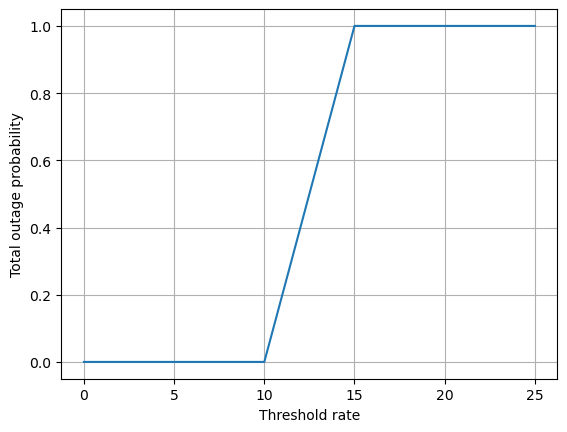

In [61]:
thresholds = np.arange(0, 30, 5)
theta_op_mat = np.array([])

for threshold in thresholds:
    theta_op_mat = np.append(theta_op_mat, total_outage_probability(rate_mat, threshold))

plt.plot(thresholds, theta_op_mat * 100)
plt.xlabel("Threshold rate")
plt.ylabel("Total outage probability")
plt.grid()
plt.show()

### Averaging Total Outage Probability Curve

In [62]:
from tqdm import tqdm

area = [-250, 250] # area of the simulation m^2
n_user = 100 # number of users
n_bs = 1 # number of base stations
n = 3.5 # path loss exponent
Ns = 50000  # number of samples
mu, sigma = 0, np.sqrt(0.5)  # mean and standard deviation
P_t = 1  # transmitted power
N = -96 # 96 dBm
iterations = 100 # number of iterations
outage_prob_mat = np.array([])
thresholds = np.arange(0, 30, 0.1)
theta_op_mat = np.array([])

for _ in tqdm(list(range(iterations))):
    # Create a network with base stration at the origin
    bs = np.array([[0, 0]])
    users = np.array([])

    for _ in range(n_user):
        x = np.random.uniform(area[0], area[1])
        y = np.random.uniform(area[0], area[1])
        users = np.append(users, np.array([x, y]))

    users = users.reshape(n_user, 2) # reshape the array to 100 x 2
    
    distance_mat = np.array([])
    path_loss_mat = np.array([])

    for user in users:
        distance_mat = np.append(distance_mat, euclidean_distance(bs[0][0], bs[0][1], user[0], user[1]))

    for distance in distance_mat:
        path_loss_mat = np.append(path_loss_mat, np.reciprocal(distance**n))

    P_r = np.array([])
    X = np.random.normal(mu, sigma, Ns)
    Y = np.random.normal(mu, sigma, Ns)
    g = np.sqrt(X**2 + Y**2)
    mag_g = np.sqrt(np.mean(g**2))

    for path_loss in path_loss_mat:
        P_r = np.append(P_r, P_t * path_loss * mag_g**2)

    P_r_dBm = 10 * np.log10(P_r) + 30 # received power in dBm

    snr_mat = np.array([])
    rate_mat = np.array([])

    for i in range(n_user):
        snr_mat = np.append(snr_mat, P_r_dBm[i] - N)
        rate_mat = np.append(rate_mat, np.log2(1 + 10**(snr_mat[i] / 10) * 1e-3))
    
    outage_prob_mat = np.append(outage_prob_mat, np.sum(rate_mat < 2) / n_user)

    for threshold in thresholds:
        theta_op_mat = np.append(theta_op_mat, total_outage_probability(rate_mat, threshold))

outage_prob = np.average(outage_prob_mat)
theta_op_mat = theta_op_mat.reshape(iterations, len(thresholds))

100%|██████████| 100/100 [00:01<00:00, 80.09it/s]


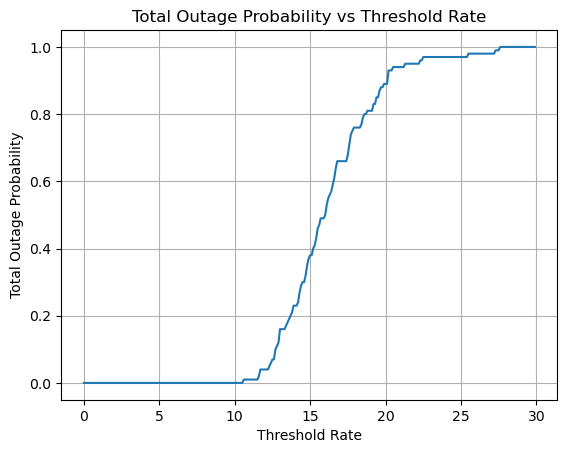

In [63]:
theta_op = np.mean(theta_op_mat, axis=0)

plt.plot(thresholds, theta_op * 100)
plt.xlabel("Threshold Rate")
plt.ylabel("Total Outage Probability")
plt.title("Total Outage Probability vs Threshold Rate")
plt.grid()
plt.show()